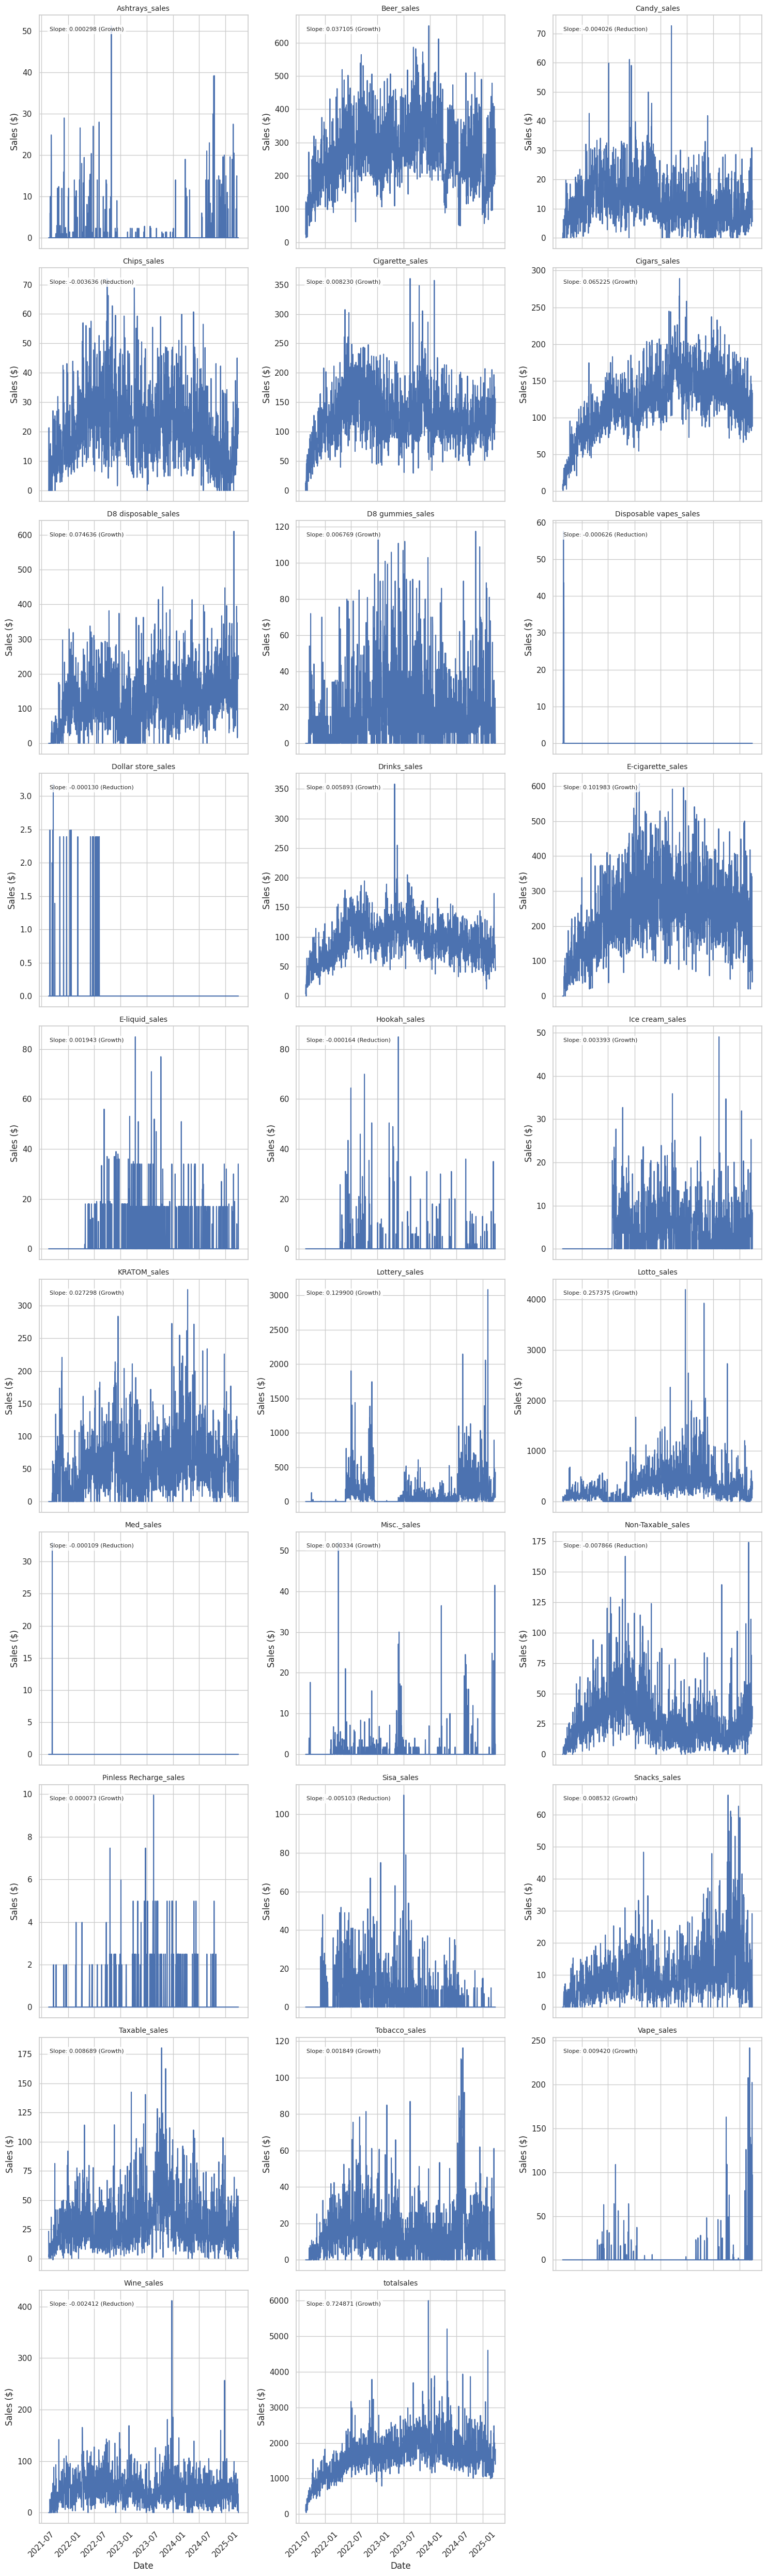

Sales Trend Slopes (Positive = Growth, Negative = Reduction):
Ashtrays_sales: Slope = 0.000298 (Growth)
Beer_sales: Slope = 0.037105 (Growth)
Candy_sales: Slope = -0.004026 (Reduction)
Chips_sales: Slope = -0.003636 (Reduction)
Cigarette_sales: Slope = 0.008230 (Growth)
Cigars_sales: Slope = 0.065225 (Growth)
D8 disposable_sales: Slope = 0.074636 (Growth)
D8 gummies_sales: Slope = 0.006769 (Growth)
Disposable vapes_sales: Slope = -0.000626 (Reduction)
Dollar store_sales: Slope = -0.000130 (Reduction)
Drinks_sales: Slope = 0.005893 (Growth)
E-cigarette_sales: Slope = 0.101983 (Growth)
E-liquid_sales: Slope = 0.001943 (Growth)
Hookah_sales: Slope = -0.000164 (Reduction)
Ice cream_sales: Slope = 0.003393 (Growth)
KRATOM_sales: Slope = 0.027298 (Growth)
Lottery_sales: Slope = 0.129900 (Growth)
Lotto_sales: Slope = 0.257375 (Growth)
Med_sales: Slope = -0.000109 (Reduction)
Misc._sales: Slope = 0.000334 (Growth)
Non-Taxable_sales: Slope = -0.007866 (Reduction)
Pinless Recharge_sales: Slope =

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

# Load the data (replace 'cmbdata.csv' with your file path)
df = pd.read_csv('cmbdata.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Identify sales columns
sales_columns = [col for col in df.columns if col.endswith('_sales')] + ['totalsales']

# Function to calculate trend slope
def calculate_trend(df, x_col, y_col):
    x = (df[x_col] - df[x_col].min()).dt.days  # Days since earliest date
    y = df[y_col].dropna()
    x = x[y.index]  # Align x with non-null y
    if len(x) > 1:  # Ensure enough data points
        slope, _, _, _, _ = linregress(x, y)
        return slope
    return np.nan

# Set up the plotting style
sns.set(style="whitegrid")

# Create a faceted line plot for each sales metric
num_metrics = len(sales_columns)
cols = 3  # Number of columns in the subplot grid
rows = (num_metrics + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True)
axes = axes.flatten()  # Flatten for easier indexing

for i, metric in enumerate(sales_columns):
    # Plot the line
    sns.lineplot(x='date', y=metric, data=df, ax=axes[i])
    
    # Calculate slope
    slope = calculate_trend(df, 'date', metric)
    
    # Determine trend label
    if np.isnan(slope):
        trend_label = "Slope: N/A"
    else:
        trend_label = f"Slope: {slope:.6f}"
        trend_label += " (Growth)" if slope > 0 else " (Reduction)" if slope < 0 else " (Stable)"
    
    # Annotate the plot with the slope
    axes[i].text(
        0.05, 0.95, trend_label,
        transform=axes[i].transAxes, fontsize=8,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )
    
    # Customize plot
    axes[i].set_title(metric, fontsize=10)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Sales ($)')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(len(sales_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Optional: Print slopes for reference
print("Sales Trend Slopes (Positive = Growth, Negative = Reduction):")
for metric in sales_columns:
    slope = calculate_trend(df, 'date', metric)
    trend = "Growth" if slope > 0 else "Reduction" if slope < 0 else "Stable" if not np.isnan(slope) else "N/A"
    print(f"{metric}: Slope = {slope:.6f} ({trend})")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np
import os

# Create the 'growth' folder if it doesn't exist
output_dir = 'growth'
os.makedirs(output_dir, exist_ok=True)

# Load the data (replace 'cmbdata.csv' with your file path)
df = pd.read_csv('cmbdata.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Identify sales columns
sales_columns = [col for col in df.columns if col.endswith('_sales')] + ['totalsales']

# Function to calculate trend slope and regression line
def calculate_trend(df, x_col, y_col):
    x = (df[x_col] - df[x_col].min()).dt.days  # Days since earliest date
    y = df[y_col].dropna()
    x = x[y.index]  # Align x with non-null y
    if len(x) > 1:  # Ensure enough data points
        slope, intercept, _, _, _ = linregress(x, y)
        # Generate regression line points
        x_dates = df[x_col].dropna()
        x_numeric = (x_dates - df[x_col].min()).dt.days
        y_pred = slope * x_numeric + intercept
        return slope, x_dates, y_pred
    return np.nan, None, None

# Set up the plotting style
sns.set(style="whitegrid")

# Create a faceted line plot for each sales metric
num_metrics = len(sales_columns)
cols = 3  # Number of columns in the subplot grid
rows = (num_metrics + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True)
axes = axes.flatten()  # Flatten for easier indexing

for i, metric in enumerate(sales_columns):
    # Plot the sales time series
    sns.lineplot(x='date', y=metric, data=df, ax=axes[i], color='blue', label='Sales')
    
    # Calculate slope and regression line
    slope, x_dates, y_pred = calculate_trend(df, 'date', metric)
    
    # Plot the regression line
    if not np.isnan(slope):
        axes[i].plot(x_dates, y_pred, color='red', linestyle='--', label='Trend')
    
    # Determine trend label
    if np.isnan(slope):
        trend_label = "Slope: N/A"
    else:
        trend_label = f"Slope: {slope:.6f}"
        trend_label += " (Growth)" if slope > 0 else " (Reduction)" if slope < 0 else " (Stable)"
    
    # Annotate the plot with the slope
    axes[i].text(
        0.05, 0.95, trend_label,
        transform=axes[i].transAxes, fontsize=8,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )
    
    # Customize plot
    axes[i].set_title(metric, fontsize=10)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Sales ($)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()
    
    # Save individual subplot
    # Create a new figure for the individual plot
    fig_single = plt.figure(figsize=(5, 4))
    ax_single = fig_single.add_subplot(111)
    sns.lineplot(x='date', y=metric, data=df, ax=ax_single, color='blue', label='Sales')
    if not np.isnan(slope):
        ax_single.plot(x_dates, y_pred, color='red', linestyle='--', label='Trend')
    ax_single.text(
        0.05, 0.95, trend_label,
        transform=ax_single.transAxes, fontsize=8,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )
    ax_single.set_title(metric, fontsize=10)
    ax_single.set_xlabel('Date')
    ax_single.set_ylabel('Sales ($)')
    ax_single.tick_params(axis='x', rotation=45)
    ax_single.legend()
    
    # Save to 'growth' folder
    safe_filename = metric.replace('.', '_')  # Replace invalid characters for filenames
    plt.tight_layout()
    fig_single.savefig(os.path.join(output_dir, f'{safe_filename}.png'), dpi=300, bbox_inches='tight')
    plt.close(fig_single)

# Hide any unused subplots
for i in range(len(sales_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
# Save the entire grid plot
fig.savefig(os.path.join(output_dir, 'all_sales_trends.png'), dpi=300, bbox_inches='tight')
plt.close(fig)

# Print slopes for reference
print("Sales Trend Slopes (Positive = Growth, Negative = Reduction):")
for metric in sales_columns:
    slope, _, _ = calculate_trend(df, 'date', metric)
    trend = "Growth" if slope > 0 else "Reduction" if slope < 0 else "Stable" if not np.isnan(slope) else "N/A"
    print(f"{metric}: Slope = {slope:.6f} ({trend})")

Sales Trend Slopes (Positive = Growth, Negative = Reduction):
Ashtrays_sales: Slope = 0.000298 (Growth)
Beer_sales: Slope = 0.037105 (Growth)
Candy_sales: Slope = -0.004026 (Reduction)
Chips_sales: Slope = -0.003636 (Reduction)
Cigarette_sales: Slope = 0.008230 (Growth)
Cigars_sales: Slope = 0.065225 (Growth)
D8 disposable_sales: Slope = 0.074636 (Growth)
D8 gummies_sales: Slope = 0.006769 (Growth)
Disposable vapes_sales: Slope = -0.000626 (Reduction)
Dollar store_sales: Slope = -0.000130 (Reduction)
Drinks_sales: Slope = 0.005893 (Growth)
E-cigarette_sales: Slope = 0.101983 (Growth)
E-liquid_sales: Slope = 0.001943 (Growth)
Hookah_sales: Slope = -0.000164 (Reduction)
Ice cream_sales: Slope = 0.003393 (Growth)
KRATOM_sales: Slope = 0.027298 (Growth)
Lottery_sales: Slope = 0.129900 (Growth)
Lotto_sales: Slope = 0.257375 (Growth)
Med_sales: Slope = -0.000109 (Reduction)
Misc._sales: Slope = 0.000334 (Growth)
Non-Taxable_sales: Slope = -0.007866 (Reduction)
Pinless Recharge_sales: Slope =